In [1]:
from google.protobuf import text_format
from ffn.inference import inference
from ffn.inference import inference_pb2

In [2]:
config = '''image {
  hdf5: "third_party/neuroproof_examples/training_sample2/grayscale_maps.h5:raw"
}
image_mean: 128
image_stddev: 33
checkpoint_interval: 1800
seed_policy: "PolicyPeaks"
model_checkpoint_path: "models/fib25/model.ckpt-27465036"
model_name: "convstack_3d.ConvStack3DFFNModel"
model_args: "{\\"depth\\": 12, \\"fov_size\\": [33, 33, 33], \\"deltas\\": [8, 8, 8]}"
segmentation_output_dir: "results/fib25/training4"
inference_options {
  init_activation: 0.95
  pad_value: 0.05
  move_threshold: 0.9
  min_boundary_dist { x: 1 y: 1 z: 1}
  segment_threshold: 0.6
  min_segment_size: 1000
}'''
req = inference_pb2.InferenceRequest()
_ = text_format.Parse(config, req)

In [3]:
runner = inference.Runner()
runner.start(req)
canvas, alignment = runner.make_canvas((0, 0, 0), (250, 250, 250))

C:\Users\Tanch\ffn\ffn\inference\storage.py:62: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  volume = h5py.File(path[0])[path[1]]



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


INFO:tensorflow:Restoring parameters from models/fib25/model.ckpt-27465036


INFO:tensorflow:Restoring parameters from models/fib25/model.ckpt-27465036


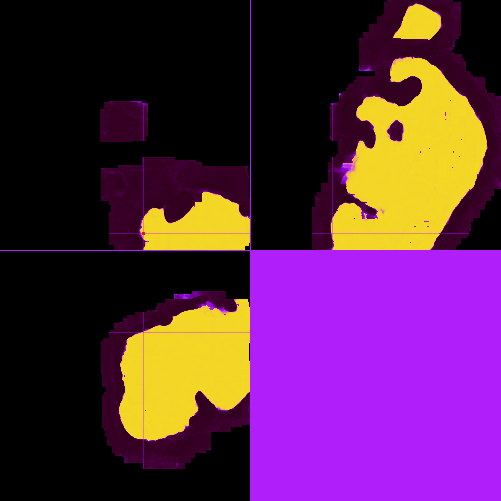

6357

In [4]:
# Create a single segment, starting from the specified origin point.
canvas.segment_at((125, 125, 125),  # zyx
                  dynamic_image=inference.DynamicImage(),
                  vis_update_every=1)

In [5]:
from ffn.utils import bounding_box_pb2
from ffn.inference import inference
from ffn.inference import inference_flags

In [6]:
bbox = bounding_box_pb2.BoundingBox()
bounding_box = 'start { x:0 y:0 z:0 } size { x:250 y:250 z:250 }'
text_format.Parse(bounding_box, bbox)

start {
  x: 0
  y: 0
  z: 0
}
size {
  x: 250
  y: 250
  z: 250
}

In [8]:
runner.run((bbox.start.z, bbox.start.y, bbox.start.x),
             (bbox.size.z, bbox.size.y, bbox.size.x))

C:\Users\Tanch\ffn\ffn\inference\inference.py:589: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.any(self.segmentation[sel] > 0):
C:\Users\Tanch\ffn\ffn\inference\inference.py:627: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mask = self.seed[sel] >= self.options.segment_threshold
C:\Users\Tanch\ffn\ffn\inference\inference.py:631: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(

In [9]:
from ffn.inference import storage

seg, _ = storage.load_segmentation('results/fib25/training4', (0, 0, 0))

In [11]:
import numpy as np
from tensorflow import gfile

filename = 'results/fib25/sample-training2.npz'
with gfile.Open(filename, "rb") as f:
    data = np.load(f, allow_pickle=True)
    if 'segmentation' in data:
        seg2 = data['segmentation']

In [12]:
from brainlit.utils.session import NeuroglancerSession
from brainlit.utils.swc import graph_to_paths
import napari

D:\Anaconda3\envs\brainlit\lib\site-packages\napari\__init__.py:44: UserWarning: 
    napari was tested with QT library `>=5.12.3`.
    The version installed is 5.9.6. Please report any issues with this
    specific QT version at https://github.com/Napari/napari/issues.
    
  warn(message=warn_message)


In [13]:
def napari_viewer(img, labels=None, shapes=None, label_name="Segmentation"):
    with napari.gui_qt():
        viewer = napari.view_image(np.squeeze(np.array(img)))
        if labels is not None:
            if isinstance(labels, list):
                for l,label in enumerate(labels):
                    name = label_name + "_" + str(l) 
                    viewer.add_labels(label, name=name)
            else:
                viewer.add_labels(labels, name=label_name)
        if shapes is not None:
            viewer.add_shapes(
                data=shapes, shape_type="path", edge_color="blue", name="Skeleton"
            )
        return viewer

In [14]:
import h5py
filename = "third_party/neuroproof_examples/training_sample2/grayscale_maps.h5"

with h5py.File(filename, "r") as f:
     # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])
    training2 = np.array(data)

Keys: <KeysViewHDF5 ['raw']>


In [19]:
# labeled with seg from default function
napari_viewer(training2, labels=seg)

In [ ]:
# labeled with seg provided on Github
napari_viewer(training2, labels=seg2)